# Decision problem for a bank

## Brief description

Banks give out loans to applicants if they believe that the applicant is capable of repaying the loan
that they applied for. Imagine that a bank only knows the probability with which someone can repay the loan. We’ll now see how high this probability has to be to warrant the bank giving an applicant a loan if we assume that the bank wants to maximize its profit.

We will assume that every applicant asks for a 1-year loan of size H. The bank offers all these applicants an interest rate of z (e.g., a 2% interest rate means z = 0.02). For the following, we will assume that the bank knows the exact repayment probability p for each applicant, i.e., the probability with which they repay their loan. In real cases, a bank would use an ML model to estimate this probability, and act on these estimation - but for this exercise, we assume that the bank has a perfect prediction model. 

The bank faces a binary decision problem with D=1 (grant the loan) or D=0 (deny the loan). The decision-critical variable Y has the values Y=1 (applicant will pay back) and Y=0 (applicant will not pay back).

## Questions
Questions (a)-(c): See exercise sheet

**(a)**

With z=0.1

| |Y=0 | Y=1 |
| - | - | - | 
| D=0 | 0 | 0 |
| D=1 | -H | H*0.1 |


With z

| |Y=0 | Y=1 |
| - | - | - | 
| D=0 | 0 | 0 |
| D=1 | -H | H*z |

**(b)**

Bank does not want to lose money E(U)>=0

- E(U) = (1-p) * u10 + p * u11 --> D=1
- =(1-p) * (-H) + p * H * z --> D=1
- = -H + pH + pHz
- -pH - pHz = -H
- p * (-H - Hz) = -H
- p = -H / (-H - Hz)
- p = -1 / (-1 - z)
- p = 1 / (1 + z)


**The rule does not depend on H. In our example 0.91**

**(c)**

p >= 1 / (1 + z) or in our case p >= 0.91 results in D=1
This rule does not depend on the specifics of the population

The other questions require a dataset. This dataset is saved in the same folder as this notebook. You can access it with `pandas.read_csv()`.

**(d)	Assume that you are given the population listed in the resources. What is the expected total profit of the bank if they apply the rule from (c)?**

In [3]:
import pandas as pd

Let us first import the dataset. For this, you can click on the folder icon on the left and then select the icon to upload a dataset. Upload the dataset 'loan_applicants.csv', so that your Google Colab Notebook has access to it.

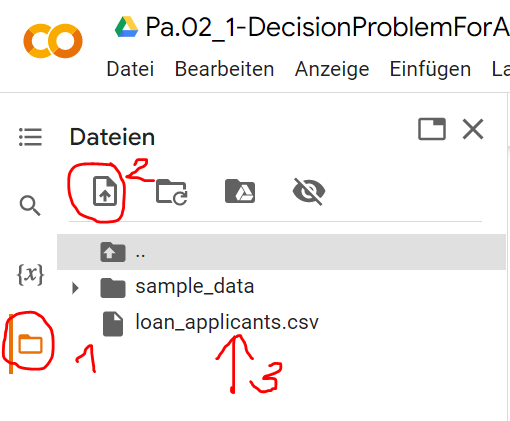

Then use pandas to read the csv file.

In [4]:
loan_applicants = pd.read_csv('loan_applicants.csv')
loan_applicants

,p,H,z
0,0.374540,1,0.1
1,0.950714,1,0.1
2,0.731994,1,0.1
3,0.598658,1,0.1
4,0.156019,1,0.1
...,...,...,...
9995,0.857656,1,0.1
9996,0.897509,1,0.1
9997,0.946708,1,0.1
9998,0.397488,1,0.1


Now it's time to add your own code.

In [15]:
def calc_p(z):
    return 1 / (1+z)
H=1
z = 0.1
p = calc_p(z)
print('p:',p)

def calc_expected_val(H, p, z):
    return (1 - p) * -H + p * z * H

loan_applications_over_threshold = loan_applicants[loan_applicants['p'] >= p]
applicant_number = len(loan_applications_over_threshold)
print('Number of accepted applicants:', applicant_number)

loan_applications_over_threshold['E'] = calc_expected_val(loan_applications_over_threshold['H'], 
                                                          loan_applications_over_threshold['p'], 
                                                          loan_applications_over_threshold['z'])

total_profit = loan_applications_over_threshold['E'].sum()
print('Total Profit:', total_profit)

p: 0.9090909090909091
Number of accepted applicants: 884
Total Profit: 43.587058396754784


C:\Users\axgno01\AppData\Local\Temp\ipykernel_24384\1833768935.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_applications_over_threshold['E'] = calc_expected_val(loan_applications_over_threshold['H'], loan_applications_over_threshold['p'],


**(e)	Assume that you are given the population listed in the resources. What is the expected profit of the bank per applicant (in percent) if they apply the rule from (c)?**

In [16]:
def calc_mean_profit_per_person(total, nr, H):
    return (total / nr) / H * 100

print('Profit per Person in %:', calc_mean_profit_per_person(total_profit, applicant_number, H))
loan_applications_over_threshold

Profit per Person in %: 4.93066271456502


,p,H,z,E
1,0.950714,1,0.1,0.045786
11,0.969910,1,0.1,0.066901
33,0.948886,1,0.1,0.043774
34,0.965632,1,0.1,0.062195
43,0.909320,1,0.1,0.000252
...,...,...,...,...
9971,0.976080,1,0.1,0.073688
9972,0.956992,1,0.1,0.052691
9978,0.950612,1,0.1,0.045673
9983,0.909824,1,0.1,0.000806


**(f)	Assume now that the bank wants to increase its expected profit per applicant. It should be 10% more than under the rule that maximizes the total profit. What rule does the bank then have to apply?**

In [21]:
# 10% more profit is p * 1.1 =~ 0.99
import numpy as np
for p_i in np.arange(0.0, 1.0, 0.01):
    laot_p_i = loan_applicants[loan_applicants['p'] >= p_i]
    profit_p_i = calc_mean_profit_per_person(calc_expected_val(laot_p_i['H'], laot_p_i['p'], 
                                                               laot_p_i['z']).sum(), 
                                                               len(laot_p_i), 1)
    print('Profit in percentage with p:', p_i, 'is', profit_p_i)

Profit in percentage with p: 0.0 is -45.64244865472704
Profit in percentage with p: 0.01 is -45.12679559621758
Profit in percentage with p: 0.02 is -44.572977095289865
Profit in percentage with p: 0.03 is -44.078799836524944
Profit in percentage with p: 0.04 is -43.482668434290105
Profit in percentage with p: 0.05 is -42.96710167767995
Profit in percentage with p: 0.06 is -42.347674888475204
Profit in percentage with p: 0.07 is -41.76055843336027
Profit in percentage with p: 0.08 is -41.13344209605846
Profit in percentage with p: 0.09 is -40.50496563239311
Profit in percentage with p: 0.1 is -40.03484104000884
Profit in percentage with p: 0.11 is -39.47767697908272
Profit in percentage with p: 0.12 is -38.942903489661276
Profit in percentage with p: 0.13 is -38.34211592831752
Profit in percentage with p: 0.14 is -37.76695253562259
Profit in percentage with p: 0.15 is -37.285494836514275
Profit in percentage with p: 0.16 is -36.78375107742819
Profit in percentage with p: 0.17 is -36.139